## MNIST
In this chapter, will be using the MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US census Bureau.

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',


Datasets loaded by Scikit-Learn generally have a simliar dictionary structure including:
- A DESCR key describing the dataset
- A data key containing an array with one row per instance and one column per feature
- A target key containing an array with the labels

In [2]:
# look at the arrays
X, y = mnist["data"], mnist["target"]

X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

There are 70,000 images, and each image has 784 features. This is because each image is 28x28 pixels, and each feature simply represents one pixel's intensity, from 0(white) to 255(black)

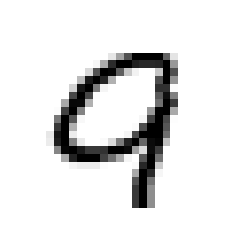

In [4]:
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[3000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, 
          interpolation="nearest")

plt.axis("off")
plt.show()

In [5]:
y[3000]

'9'

The MNIST dataset is already split into a training set(the first 60k images) and a test set(the last 10k images)

In [6]:
# Create the train and test set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Shuffle the training set
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Training a Binary Classifier
Let's simplify the problem for now and only try to identify one digit, for example the number 5.
<br>
This "5-detector" will be an example of a <b>binary classifier</b>, capable of distinguishing between just two classes, 5 and not-5.

In [7]:
y_train_5 = (y_train == '9') # True for all 5s, False for all other digits
y_test_5 = (y_test == '9')

### Stochastic Gradient Descent(SGD) classifier.
the SGD classifier has the advantage of being capable of handling very large datasets efficiently. This is because SGD deals with training instances independently, one at a time(which also makes SGD well suited for online learning)

In [8]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
sgd_clf.predict([some_digit])

array([ True])

## Performance Measures

Evaluating a classifier is often significantly trickier than evaluating a regressor, so we will spend a large part of this chapter on this topic.

### Measuring Accuracy Using Cross-Validation
#### StratifiedKFold:
The <b>StratifiedKFold</b> class performs stratified sampling(as explained in Chapter 2) to produce folds that contain a representative ratio of each class. At each iteration the code creates a clone of the classifier, trains that clone on the training folds, and makes predictions on the test fold. Then it counts the number of correct predictions and outputs the ratio of correct predictions.

In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9324
0.87005
0.9061


#### cross_val_score()
Use the cross_val_score() function to evaluate your SGDClassifier model using K-fold cross-validation, with three folds. Remember that K-fold cross-validation means splitting the training set into K-folds(in this case, three), then making predictions and evaluating them on each fold using a model trained on the remaining folds.

In [11]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9324 , 0.87005, 0.9061 ])

The result has over 90% accuracy! This is simply because only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time.
<br>
<br>
When dealing with <b>skewed datasets</b>(i.e., when some classes are much more frequent than others), <b>accuracy</b> is generally not the preferred performance measure for classifiers.

## Confusion Matrix

A better way to evaluate the performance of a classifier is to look at the <b>confusion matrix.</b> The general idea is to count the number of times instances of class A are classified as class B. For example, to know the number of times the classifier confused images of 5s with 3s, you would look in the 5th row and 3rd column of the confused matrix.
<br>
<br>
To compute the confusion matrix, you first need to have a set of predictions, so they can be compared to the actual targets. You could make predictions on the test set but its better to save the test set for the end, so use the <b>cross_val_predict()</b> function:

In [12]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

Just like the cross_val_score() function, cross_val_predict() performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold. This means that you get a clean prediction for each instance in the training set("clean" meaning that the prediction is made by a model that never saw the data during training).

In [13]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

# Pass the target classes(y_train_5) and the predicted classes(y_train_pred)
confusion_matrix(y_train_5, y_train_pred)

array([[49686,  4365],
       [ 1464,  4485]], dtype=int64)

### Acurracy = Number of correct predictions / Total number of predictions

## True, false, positive, negative
[True Negative, False Positive]
<br>
[False Negatives, True Positives]
<br>
<br>
<b>True Negative</b> (TN): Patient is healthy |  Model predicts: healthy
<br>
<br>
<b>False Positive</b> (FP): Patient is healthy | Model predicts: pneumonia
<br>
<br>
<b>False Negative</b> (FN): Patient has pneumonia | Model predicts: healthy
<br>
<br>
<b>True Positive</b> (TP): Patient has pneumonia | Model predicts: pneumonia
<br>
<br>
Each <b>row</b> in a confusion matrix represents an actual class, while each <b>column</b> represents a predicted class

## Precision = TP / TP + FP
<b>Precision</b> - What proportion of positive identifications was actually correct?

## Recall = TP / TP + FN
<b>Recall</b> - What proportion of actual positives was identified correctly?

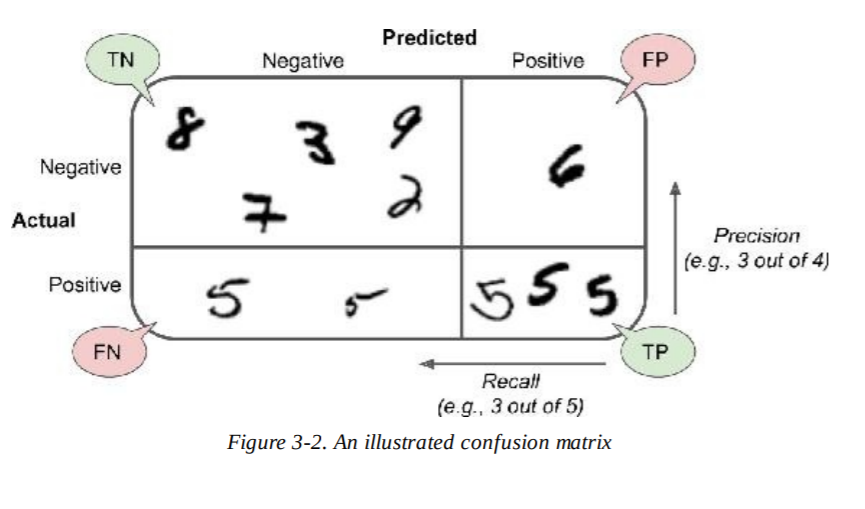

## Precision and Recall

In [14]:
# Scikit-Learn provides functions to compute classifier metrics
from sklearn.metrics import precision_score, recall_score

precision_score = precision_score(y_train_5, y_train_pred)
recall_score = recall_score(y_train_5, y_train_pred)

print("Precision:", precision_score)
print("Recall:", recall_score)

Precision: 0.5067796610169492
Recall: 0.7539082198688856


It is often convenient to combine precision and recall into a single metric called the F1 score, <b>F1</b> score is the harmonic mean of precision and recall
<br>
<br>
<b>harmonic mean.</b> Where the regular mean treats all values equally, the harmonic mean gives much more weight to low values. As a resultm the classifier will only get a high F1 score if both recall and precision are high

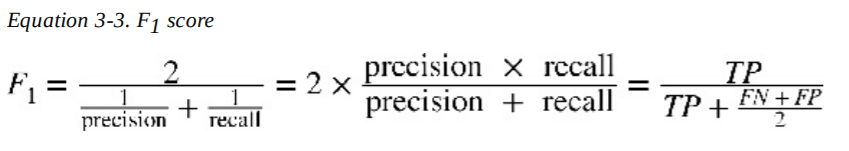

In [15]:
# Compute the F1 score, simply call the f1_score() function:
from sklearn.metrics import f1_score

f1 = f1_score(y_train_5, y_train_pred)
print("F1 Score:", f1)

F1 Score: 0.6061220352726535


## Precision/Recall Tradeoff

Tweaking thresholds from the SGDClassifier's decision function can alter the score of the Precision and Recall. Depending on what your objective is, for example if you want a higher precision or recall, you can tweak the various thresholds to adjust your outcomes.

In [16]:
# instead of calling predict() method you call decision_function() method, which returns a score for each instance
# and then make predictions based on those scores using any threshold you want

y_scores = sgd_clf.decision_function([some_digit])
y_scores

# Since the threshold is 0 the classifier will make the same predictions
threshold = 0
y_some_digit_pred = (y_scores > threshold)

# Since the threshold is 200000, 
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

Raising the threshold increases precision, but decreases recall

In [17]:
# using the cross_val_predict you can have it return decision scores instead of predictions
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

# you can compute precision and recall for all possible thresholds using precision_recall_curve() function
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

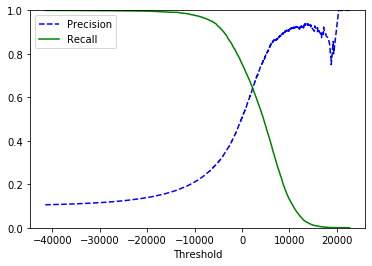

In [18]:
# plot the precision and recall as functions of the threshold value using Matplotlib
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

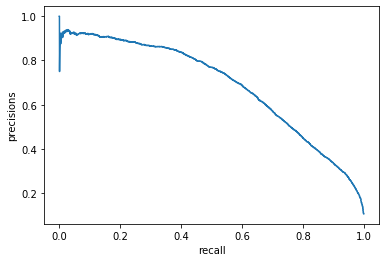

In [19]:
plt.plot(recalls[:-1], precisions[:-1])
plt.xlabel("recall")
plt.ylabel("precisions")

plt.show()

In [20]:
y_train_pred_90 = (y_scores > 70000)

precision_score(y_train_5, y_train_pred_90)

TypeError: 'numpy.float64' object is not callable

In [21]:
recall_score(y_train_5, y_train_pred_90)

TypeError: 'numpy.float64' object is not callable

## The ROC Curve

In [22]:
The receiver operating characteristic(ROC) - The ROC curve plots sensitivty(recall) versus 1 - specificity.

SyntaxError: invalid syntax (<ipython-input-22-04c15b6d4af6>, line 1)

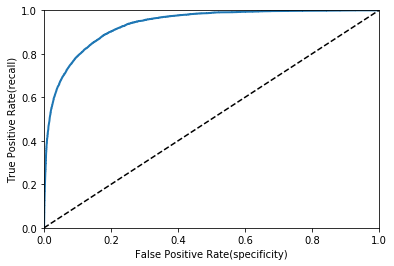

In [23]:
# compute the TPR and FPR for various threshold values, using the roc_curve() function
from sklearn.metrics import roc_curve

# fpr = specificity, tpr = recall, senstivity
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate(specificity)')
    plt.ylabel('True Positive Rate(recall)')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [24]:
# To compute the AUC curve function use the function below
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.935044077006656

In [25]:
# Compare the ROC curve and AUC score between SGDClassifier and RandomForestClassifier
# RFC doesn't have a decision_function() method, instead it has predict_proba() method
# predict_proba() method returns an array containing a row per instance and a column per class,
# each containing the probability that the given instance belongs to the given class(e.g 70% chance that the image represents a 5)
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                   method='predict_proba')

In [26]:
# to plot a ROC curve, you need scores, not probabilities, A simple solution is to use the positive class's probability as the score
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

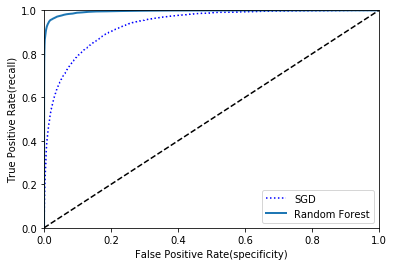

In [27]:
#plot the SGD and Random Forest ROC curve to compare
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [28]:
# AUC score of Random Forest
roc_auc_score(y_train_5, y_scores_forest)

0.9953495263724628

# Multiclass Classification

Some algorithms (such as Random Forest classifiers or naive Bayes classifiers) are capable of handling multiple classes directly. Others (such as Support Vector Machine classifiers or Linear classifiers) are strictly binary classifiers

### one-versus-all (OvA) / one-versus-the-rest - using binary classifiers to classify multiple classes by using x amount of classifiers for x amount of classes

### one-versus-one (OvO) strategy - train a binary classifier for every pair of digits

In [29]:
# Scikit-Learn detects when you try to use a binary classification algorithm for a multiclass classification task
# it automatically runs OvA (except for SVM classifiers for which it uses OvO)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['9'], dtype='<U1')

In [30]:
# to check under the hood use decision_function() method
# Instead of returning just one score per instance, it now returns 10 scores, one per class
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-27867.71406058, -55896.54446426,  -2672.35063706,
        -15427.03533693,  -8599.045465  ,  -6018.26258583,
        -14839.95804798,  -6882.84736927,  -7270.17369067,
           944.7852865 ]])

In [31]:
# the highest score was 5
np.argmax(some_digit_scores)

9

In [32]:
sgd_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [33]:
sgd_clf.classes_[5]

'5'

To force ScikitLearn to use one-versus-one or one-versus-all, you can use the OneVsOneClassifier or OneVsRestClassifier classes

In [34]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

len(ovo_clf.estimators_)

45

In [35]:
# RandomForestClassifier
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array(['9'], dtype=object)

In [36]:
# For RandomForestClassifier run predict_proba to get the list of probabilities the classifier assigned to each instance for each class
forest_clf.predict_proba([some_digit])

array([[0.08, 0.01, 0.02, 0.01, 0.03, 0.02, 0.01, 0.01, 0.01, 0.8 ]])

In [37]:
# In order to evaluate the classifiers, you want to use cross-validation.
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.8809 , 0.88565, 0.88425])

In [ ]:
# Scaling the inputs 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

## Error Analysis

Of course, if this were a real project, you would follow the steps in your Machine Learning project
checklist (see Appendix B): exploring data preparation options, trying out multiple models, shortlisting
the best ones and fine-tuning their hyperparameters using GridSearchCV, and automating as much as
possible, as you did in the previous chapter. 

In [ ]:
# take a look at the confusion matrix to see the results
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix

In [ ]:
# use matplotlib to visualize in an image representation of the confusion matrix
# Using matploblib's matshow() function
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

## Multilabel Cassification

<b>Multiclass classification</b> means a classification task with more than two classes; e.g., classify a set of images of fruits which may be oranges, apples, or pears. Multiclass classification makes the assumption that each sample is assigned to one and only one label: a fruit can be either an apple or a pear but not both at the same time.

<b>Multilabel classification</b> assigns to each sample a set of target labels. This can be thought of as predicting properties of a data-point that are not mutually exclusive, such as topics that are relevant for a document. A text might be about any of religion, politics, finance or education at the same time or none of these.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Creating two target labels for each digit image
# The first indicates whether or not the digit is large (7,8, or 9)
y_train_large = (y_train >= 7)
# The second indicates whether or not it is odd
y_train_odd = (y_train % 2 == 1)
# Creates the multilabel using the two indicators
y_multilabel = np.c_[y_train_large, y_train_odd]

# KNiehgborsClassifier supports multilabel classification but not all classifiers do
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

In [ ]:
knn_clf.predict([some_digit])

The digit is indeed not large (False) and odd (True). The predictor gets it right!

In [ ]:
# One way to evaluate a multilabel classifier is to use the F1 score for each individual label, then compute the average score
# This code assumes that all labels are equally important which may not be the case
# if you have many more pictures of Alice than of Bob or Charlie, you may want to give more weight to the classifier's score on
# pictures of Alice.
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average="macro")

## Multioutput Classification

Multioutput-multiclass classfication/ multioutput classification - For example, classification of the properties “type of fruit” and “colour” for a set of images of fruit. The property “type of fruit” has the possible classes: “apple”, “pear” and “orange”. The property “colour” has the possible classes: “green”, “red”, “yellow” and “orange”. Each sample is an image of a fruit, a label is output for both properties and each label is one of the possible classes of the corresponding property.

In [ ]:
# Start by creating the training and test sets by taking the MNIST images and adding noise to their pixel intensities using NumPy's randint() function
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test +noise
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
# train the classifier and make it clean this image
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)